In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('cust_satisfaction.csv')
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [4]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [5]:
df.isnull().sum()
df.dropna(inplace=True)

In [6]:
df["Customer Type"].value_counts()

Customer Type
Loyal Customer       84517
disloyal Customer    18905
Name: count, dtype: int64

In [7]:
loyal_customers = df[df["Customer Type"] == "Loyal Customer"]
disloyal_customers = df[df["Customer Type"] == "disloyal Customer"]

In [8]:
loyal_customers=loyal_customers.sample(20000)
loyal_customers.shape

(20000, 12)

In [9]:
balanced_df = pd.concat([loyal_customers, disloyal_customers], axis=0)
balanced_df.shape

(38905, 12)

In [10]:
cat_col= balanced_df.select_dtypes(include=['object'])
cat_col

,Gender,Customer Type,Type of Travel,Class,satisfaction
78001,Female,Loyal Customer,Business travel,Business,satisfied
84269,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
40516,Female,Loyal Customer,Business travel,Eco,neutral or dissatisfied
79262,Male,Loyal Customer,Business travel,Business,satisfied
15707,Female,Loyal Customer,Personal Travel,Eco,satisfied
...,...,...,...,...,...
103892,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied
103895,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied


In [11]:
num_col= balanced_df.select_dtypes(exclude=['object'])
num_col

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
78001,22,1449,5,5,5,6,0.0
84269,60,175,2,2,2,2,6.0
40516,41,919,3,4,3,0,17.0
79262,48,283,5,2,5,12,9.0
15707,20,628,1,4,1,16,4.0
...,...,...,...,...,...,...,...
103892,37,596,3,3,3,110,121.0
103895,24,1055,1,5,1,13,10.0
103899,23,192,2,4,2,3,0.0
103901,30,1995,4,4,4,7,14.0


In [12]:
cat_col

,Gender,Customer Type,Type of Travel,Class,satisfaction
78001,Female,Loyal Customer,Business travel,Business,satisfied
84269,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
40516,Female,Loyal Customer,Business travel,Eco,neutral or dissatisfied
79262,Male,Loyal Customer,Business travel,Business,satisfied
15707,Female,Loyal Customer,Personal Travel,Eco,satisfied
...,...,...,...,...,...
103892,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied
103895,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied


In [13]:
## one hot encoding
cat_col = pd.get_dummies(cat_col, drop_first=True).astype(int)           # drop_first=True avoids dummy variable trap
cat_col

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
78001,0,0,0,0,0,1
84269,1,0,1,1,0,0
40516,0,0,0,1,0,0
79262,1,0,0,0,0,1
15707,0,0,1,1,0,1
...,...,...,...,...,...,...
103892,0,1,0,0,0,0
103895,0,1,0,1,0,0
103899,0,1,0,1,0,0
103901,1,1,0,0,0,0


In [14]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
ohe= OneHotEncoder(drop="if_binary")
cat_col_encoded = ohe.fit_transform(cat_col).toarray()
cat_col_encoded

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 1., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.]], shape=(38905, 6))

In [15]:
column_name=list(ohe.get_feature_names_out())
column_name

['Gender_Male_1',
 'Customer Type_disloyal Customer_1',
 'Type of Travel_Personal Travel_1',
 'Class_Eco_1',
 'Class_Eco Plus_1',
 'satisfaction_satisfied_1']

In [16]:
one_hot = pd.DataFrame(cat_col_encoded,columns=column_name)
one_hot.head()

,Gender_Male_1,Customer Type_disloyal Customer_1,Type of Travel_Personal Travel_1,Class_Eco_1,Class_Eco Plus_1,satisfaction_satisfied_1
0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,1.0


In [17]:
one_hot= one_hot.reset_index(drop=True)
num_col= num_col.reset_index(drop=True)
# final_df=pd.concat([one_hot,num_col],axis=1)
# final_df.head()

In [18]:
final_df=pd.concat([num_col,one_hot],axis=1)
final_df.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male_1,Customer Type_disloyal Customer_1,Type of Travel_Personal Travel_1,Class_Eco_1,Class_Eco Plus_1,satisfaction_satisfied_1
0,22,1449,5,5,5,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,60,175,2,2,2,2,6.0,1.0,0.0,1.0,1.0,0.0,0.0
2,41,919,3,4,3,0,17.0,0.0,0.0,0.0,1.0,0.0,0.0
3,48,283,5,2,5,12,9.0,1.0,0.0,0.0,0.0,0.0,1.0
4,20,628,1,4,1,16,4.0,0.0,0.0,1.0,1.0,0.0,1.0


In [19]:
## x and y --> train test split ---> algo traning

In [20]:
matrix = final_df.corr()
matrix       

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male_1,Customer Type_disloyal Customer_1,Type of Travel_Personal Travel_1,Class_Eco_1,Class_Eco Plus_1,satisfaction_satisfied_1
Age,1.000000,0.143721,0.082800,-0.047595,0.059237,-0.012513,-0.014573,0.011762,-0.382414,0.077625,-0.183448,0.021992,0.127212
Flight Distance,0.143721,1.000000,0.115936,0.044172,0.085736,-0.003136,-0.006536,0.017854,-0.335370,-0.125610,-0.341301,-0.080682,0.278080
Inflight entertainment,0.082800,0.115936,1.000000,0.243463,0.797078,-0.026195,-0.027394,0.013638,-0.140073,-0.068533,-0.124473,-0.030736,0.283085
Baggage handling,-0.047595,0.044172,0.243463,1.000000,0.059699,-0.016696,-0.018871,0.029049,0.035542,-0.037344,-0.205228,-0.077828,0.223075
Cleanliness,0.059237,0.085736,0.797078,0.059699,1.000000,-0.005970,-0.005924,0.011263,-0.105552,-0.029815,-0.082982,-0.019844,0.215451
Departure Delay in Minutes,-0.012513,-0.003136,-0.026195,-0.016696,-0.005970,1.000000,0.962808,0.003470,0.013599,-0.006360,0.020387,0.007804,-0.053775
Arrival Delay in Minutes,-0.014573,-0.006536,-0.027394,-0.018871,-0.005924,0.962808,1.000000,0.000966,0.015486,-0.007667,0.023333,0.009163,-0.059702
Gender_Male_1,0.011762,0.017854,0.013638,0.029049,0.011263,0.003470,0.000966,1.000000,-0.045381,0.012381,-0.010819,-0.030286,0.027287
Customer Type_disloyal Customer_1,-0.382414,-0.335370,-0.140073,0.035542,-0.105552,0.013599,0.015486,-0.045381,1.000000,-0.459225,0.154809,-0.086201,-0.259245
Type of Travel_Personal Travel_1,0.077625,-0.125610,-0.068533,-0.037344,-0.029815,-0.006360,-0.007667,0.012381,-0.459225,1.000000,0.323807,0.114502,-0.262165


<Axes: >

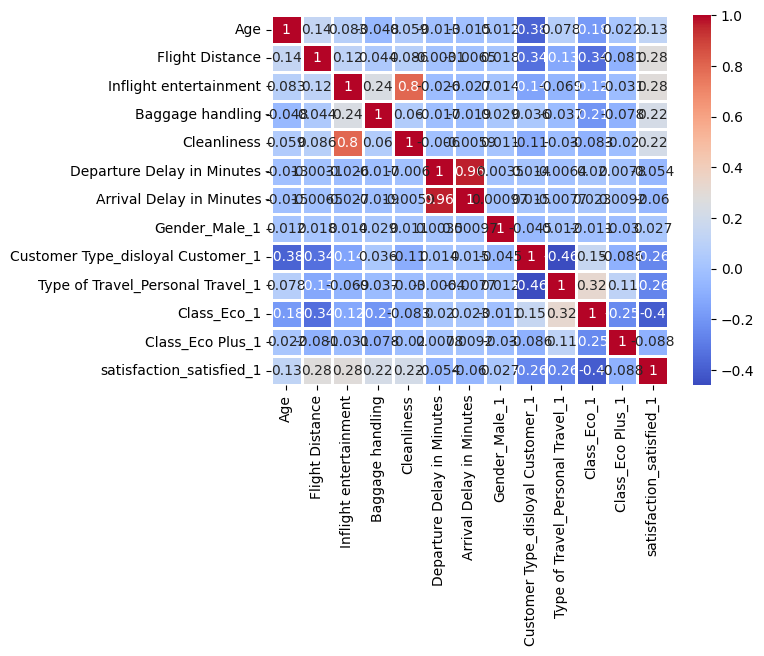

In [21]:
sns.heatmap(matrix,annot=True,cmap='coolwarm',linewidths=1)

In [22]:
## divide the data into x and y or independent and dependent variable
x = final_df.drop("satisfaction_satisfied_1",axis=1)
y= final_df["satisfaction_satisfied_1"]

In [23]:
## trainning and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                                test_size=0.2,
                                               random_state=42) 

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)  # fit the model with traning data

C:\Users\Akshat\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
lr.score(x_train,y_train)  # score the model with traning data

0.7736794756458039

In [26]:
lr.score(x_test,y_test)

0.7739365120164503

In [27]:
# model evaluation
y_pred=lr.predict(x_test)  # predict the values using testing data
y_pred

array([0., 0., 1., ..., 0., 0., 1.], shape=(7781,))

In [28]:
## making a dataframe 
df1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})  # create a dataframe with actual and predicted values
df1.head(5)  # show the first 20 rows of the dataframe

,Actual,Predicted
18536,0.0,0.0
36240,0.0,0.0
5426,1.0,1.0
21679,1.0,0.0
18714,1.0,1.0


In [29]:
from sklearn .metrics import log_loss
print("Log loss:",log_loss(y_test,y_pred))

Log loss: 8.148154004813914


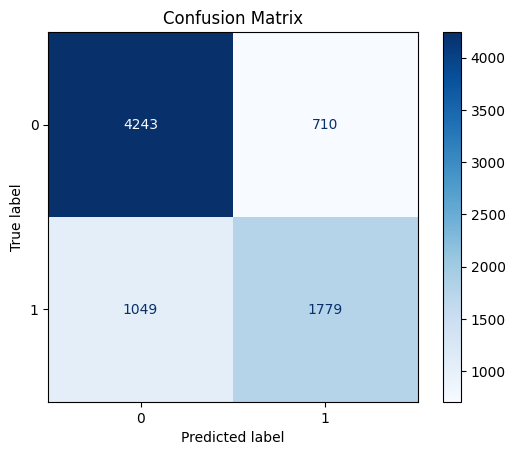

In [30]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

y_pred = lr.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

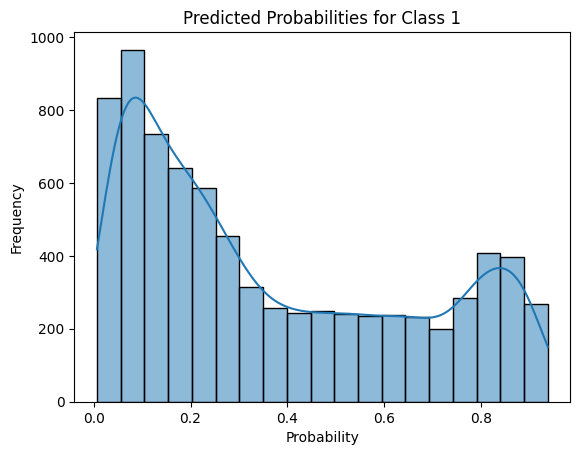

In [31]:
 #Get predicted probabilities for class 1
y_probs = lr.predict_proba(x_test)[:, 1]

sns.histplot(y_probs, kde=True)
plt.title("Predicted Probabilities for Class 1")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()


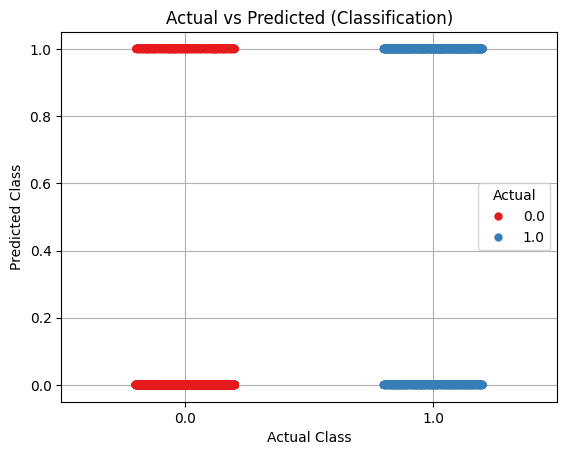

In [32]:
sns.stripplot(x=y_test, y=y_pred, hue=y_test, jitter=0.2, palette="Set1", size=6)
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.title("Actual vs Predicted (Classification)")
plt.legend(title='Actual')
plt.grid(True)
plt.show()


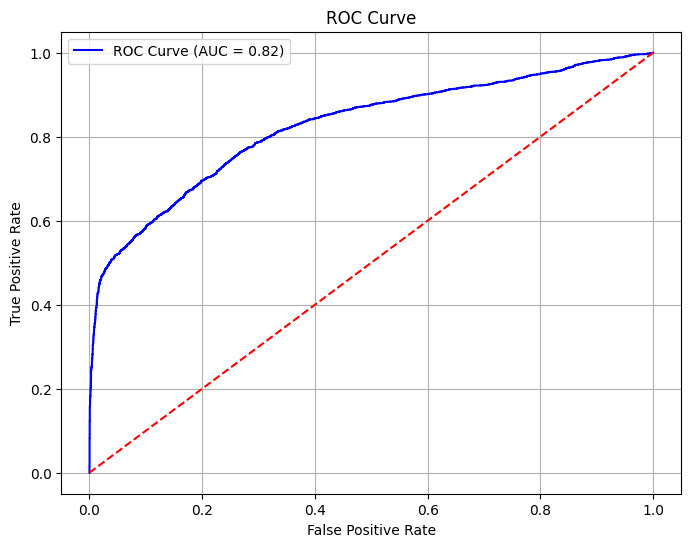

In [33]:
from sklearn.metrics import roc_curve, auc

# probabilities for class 1 (satisfied)
y_probs = lr.predict_proba(x_test)[:, 1]

# ROC ke liye TPR and FPR nikaalo
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# AUC score
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


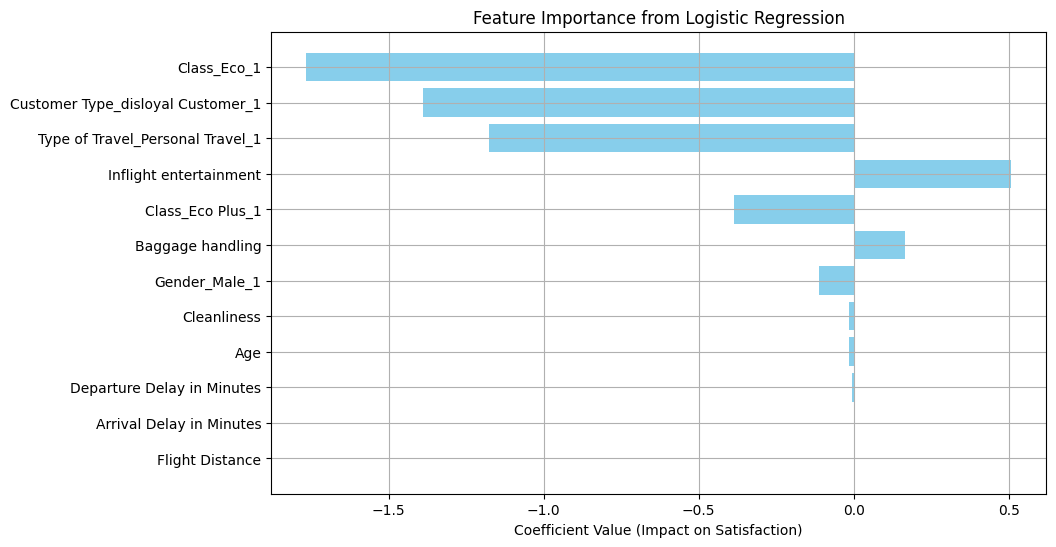

In [34]:
# Get feature names from x.columns
feature_names = x.columns

# Get coefficients from trained model
coefficients = lr.coef_[0]

# Create a DataFrame
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})

# Sort by absolute value of importance
feature_importance['abs_importance'] = abs(feature_importance['Importance'])
feature_importance = feature_importance.sort_values(by='abs_importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel("Coefficient Value (Impact on Satisfaction)")
plt.title("Feature Importance from Logistic Regression")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [35]:
import pickle

# Logistic Regression model ko save karo
with open("satisfaction_model.pkl", "wb") as f:
    pickle.dump(lr, f)

# Column order bhi save karo (taaki future prediction me data same ho)
columns = list(x.columns)
with open("columns.pkl", "wb") as f:
    pickle.dump(columns, f)


In [36]:
# Model load karna
with open("satisfaction_model.pkl", "rb") as f:
    model = pickle.load(f)

# Columns load karna
with open("columns.pkl", "rb") as f:
    cols = pickle.load(f)

# Suppose koi new input aaya hai:
import numpy as np
new_data = np.array([[35, 1200, 4, 4, 4, 10, 5, 1, 0, 1, 0, 0]])  # example input

# Predict karo
prediction = model.predict(new_data)
print("Prediction:", prediction)


Prediction: [1.]


C:\Users\Akshat\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [37]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [38]:
print(final_df.columns)


Index(['Age', 'Flight Distance', 'Inflight entertainment', 'Baggage handling',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male_1', 'Customer Type_disloyal Customer_1',
       'Type of Travel_Personal Travel_1', 'Class_Eco_1', 'Class_Eco Plus_1',
       'satisfaction_satisfied_1'],
      dtype='object')


In [39]:
print(final_df.drop("satisfaction_satisfied_1", axis=1).columns)


Index(['Age', 'Flight Distance', 'Inflight entertainment', 'Baggage handling',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male_1', 'Customer Type_disloyal Customer_1',
       'Type of Travel_Personal Travel_1', 'Class_Eco_1', 'Class_Eco Plus_1'],
      dtype='object')
